<a href="https://colab.research.google.com/github/juliaschubertpeixoto/TCC/blob/main/Normalization_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

#Data Processing

##Load Data

In [ ]:
path = '/content/drive/MyDrive/[TCC] Final Version/MSRC-12 Dataset/Normalization Method/'
os.chdir(path)
X_train = np.load('train_data.npy' ).astype(np.float32)
y_train = np.load('train_tag.npy' ).astype(np.int32)
X_val = np.load('eval_data.npy' ).astype(np.float32)
y_val = np.load('eval_tag.npy' ).astype(np.int32)
print("Data imported successfuly!")

Data imported successfuly!


##Split Data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)
print("Data splited successfuly!")
print(" ")
print("Number of samples on training set:", y_train.shape[0])
print("Number of samples on validation set:", y_val.shape[0])
print("Number of samples on test set:", y_test.shape[0] )

Data splited successfuly!
 
Number of samples on training set: 4191
Number of samples on validation set: 1032
Number of samples on test set: 1032


##Normalize data

In [ ]:
new_train_data = tf.reshape(X_train, (-1,667*60)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_train = tf.reshape(newN, (-1,667,60))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_val, (-1,667*60)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_val = tf.reshape(newN, (-1,667,60))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_test, (-1,667*60)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_test = tf.reshape(newN, (-1,667,60))
print("Data normalized successfuly!")

Data normalized successfuly!


##Reshape Data

In [ ]:
train_data_conv = tf.reshape(X_train, (-1,667,60,1))
val_data_conv = tf.reshape(X_val, (-1,667,60,1))
test_data_conv = tf.reshape(X_test, (-1,667,60,1))
print("Data reshaped successfuly!")

Data reshaped successfuly!


#Convolutional Neural Network

##Training

*Proposed Model*

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(667,60,1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=7104, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=12, activation='softmax'))
model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 667, 60, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 222, 20, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 20, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 6, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 3, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7104)              0

*Training*

In [ ]:
history = model.fit(train_data_conv, y_train,
          validation_data=(val_data_conv, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 15s 20ms/step - loss: 2.4904 - accuracy: 0.1286 - val_loss: 1.8851 - val_accuracy: 0.3382
Epoch 2/30
420/420 [==============================] - 7s 18ms/step - loss: 1.6671 - accuracy: 0.3931 - val_loss: 1.3132 - val_accuracy: 0.5630
Epoch 3/30
420/420 [==============================] - 7s 18ms/step - loss: 1.1609 - accuracy: 0.5923 - val_loss: 1.0321 - val_accuracy: 0.6715
Epoch 4/30
420/420 [==============================] - 7s 18ms/step - loss: 0.8796 - accuracy: 0.7037 - val_loss: 0.9925 - val_accuracy: 0.6734
Epoch 5/30
420/420 [==============================] - 7s 18ms/step - loss: 0.6868 - accuracy: 0.7672 - val_loss: 0.8089 - val_accuracy: 0.7384
Epoch 6/30
420/420 [==============================] - 8s 19ms/step - loss: 0.4686 - accuracy: 0.8456 - val_loss: 0.7846 - val_accuracy: 0.7849
Epoch 7/30
420/420 [==============================] - 8s 18ms/step - loss: 0.3618 - accuracy: 0.8830 - val_loss: 0.8495 - val_accuracy: 0.766

###Analysis

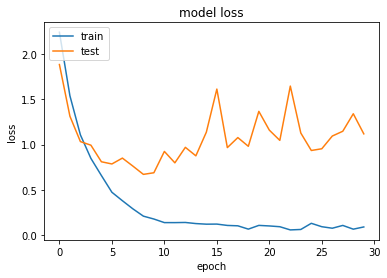

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

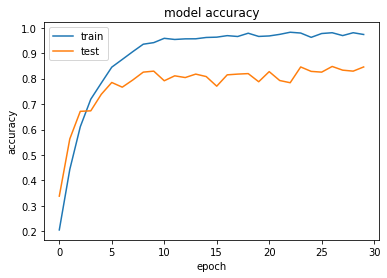

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(test_data_conv)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8420542635658915


#Recurrent Neural Network

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(667,60)),   
tf.keras.layers.LSTM(128, return_sequences=True),
tf.keras.layers.LSTM(128, dropout=0.1),
tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer = 'RMSProp',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 667, 128)          96768     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 229,900
Trainable params: 229,900
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 25s 54ms/step - loss: 2.1879 - accuracy: 0.2409 - val_loss: 2.6058 - val_accuracy: 0.2006
Epoch 2/30
420/420 [==============================] - 22s 52ms/step - loss: 1.6021 - accuracy: 0.4491 - val_loss: 1.5730 - val_accuracy: 0.4651
Epoch 3/30
420/420 [==============================] - 22s 52ms/step - loss: 1.3810 - accuracy: 0.5537 - val_loss: 1.7461 - val_accuracy: 0.4351
Epoch 4/30
420/420 [==============================] - 22s 52ms/step - loss: 1.2074 - accuracy: 0.6064 - val_loss: 1.0223 - val_accuracy: 0.6890
Epoch 5/30
420/420 [==============================] - 22s 52ms/step - loss: 1.0459 - accuracy: 0.6813 - val_loss: 0.8950 - val_accuracy: 0.7297
Epoch 6/30
420/420 [==============================] - 23s 54ms/step - loss: 0.9316 - accuracy: 0.7202 - val_loss: 0.9548 - val_accuracy: 0.6764
Epoch 7/30
420/420 [==============================] - 22s 53ms/step - loss: 0.8892 - accuracy: 0.7251 - val_loss: 0.7893 - val_accuracy:

###Analysis

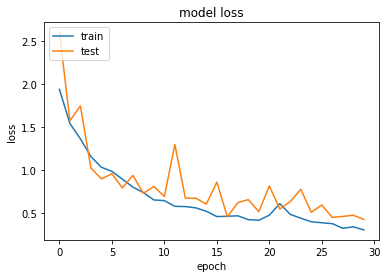

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

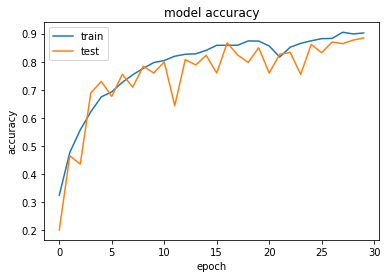

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8914728682170543
